In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Dados duplicados

In [6]:
# Checar se ha duplicados
train_df.drop_duplicates(ignore_index=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Survived

In [7]:
# Checa se os valores estao conforme esperados
train_df["Survived"].unique()

array([0, 1])

## Pclass
Esse atributo representa a classe do tiquete do passageiro, com:
* 1 - Primeira classe;
* 2 - Segunda classe;
* 3 - Terceira classe. 

Essas categorias estão intimamente relacionadas à classe social e econômica do passageiro.

In [8]:
train_df["Pclass"].unique()

array([3, 1, 2])

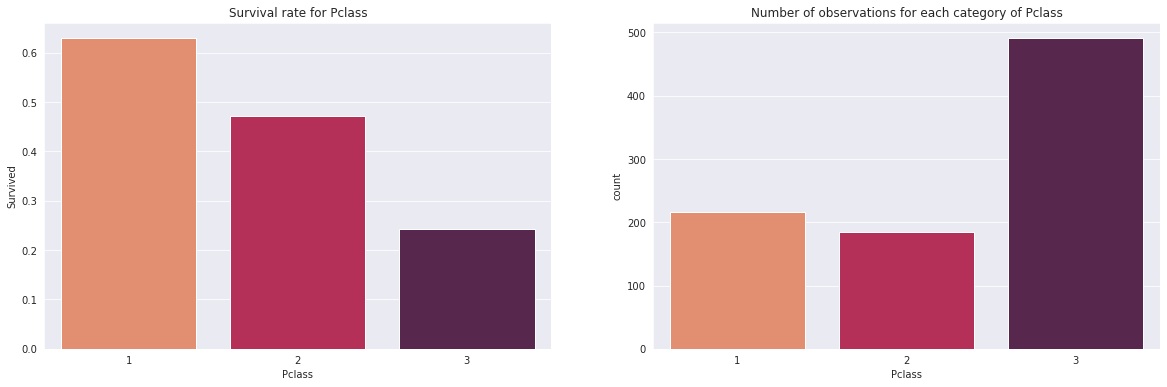

In [9]:
def grafico_de_barras_sobrevivencia(df, column, title = ""):
    """
    Funcao que plota um grafico para a taxa de sobrevivencia 
    de acordo com a coluna categorica passada
    """
    taxa_grupos = df.groupby(column)[["Survived"]].mean()
    fig, ax = plt.subplots(ncols = 2,figsize = (20,6)) 
    sns.barplot(x=taxa_grupos.index, y = taxa_grupos["Survived"], palette = "rocket_r", ax=ax[0], order = taxa_grupos.index.sort_values())
    sns.countplot(x=df[column], palette = "rocket_r", ax=ax[1], order = taxa_grupos.index.sort_values())
    ax[0].set_title("Survival rate for "+ column+title)
    ax[1].set_title("Number of observations for each category of "+ column+title)
    return 

grafico_de_barras_sobrevivencia(train_df, "Pclass")

Pode se notar que a classe do passageiro influe fortemente sobre a taxa de sobrevivencia. Isso acaba indicando que passageiros provenientes de maiores classes sociais foram privilegiados na hora do embarque

## Sex

In [10]:
# Analise simples
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

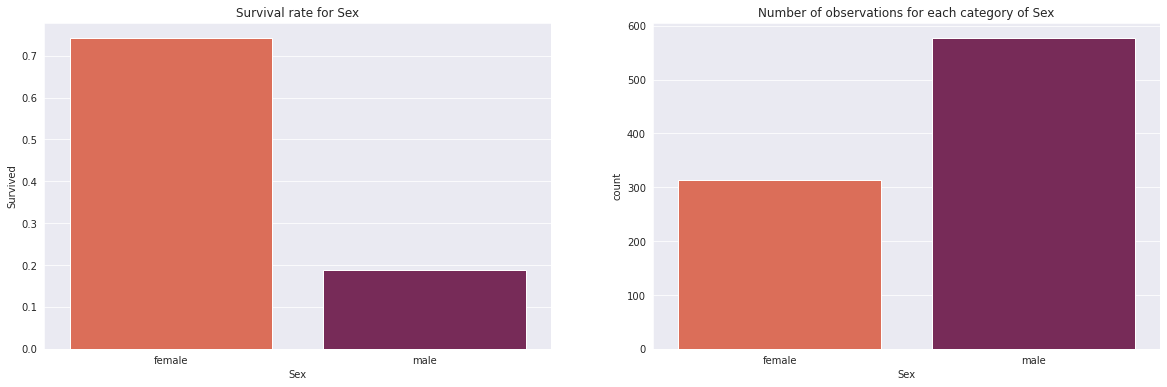

In [11]:
grafico_de_barras_sobrevivencia(train_df, "Sex")

Pode-se notar que as mulheres apresentaram uma maior taxa de sobrevivencia quando comparado aos homens. Isso indica que durante o embarque nos botes elas foram preferenciadas.

## Age
Para o atributo da idade, ja foi possivel perceber que ele apresenta alguns valores nulos. Para isso vamos primeiro analisar a distribuicao dos valores nao nulos e substituir os valores nulos por uma distribuicao normal com media e variancia adequadas

In [12]:
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

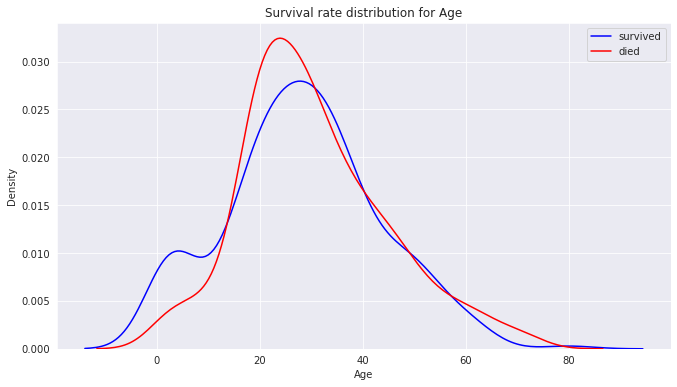

In [13]:
def displot_sobrevivencia(df, column, title = ""):
    """
    Funcao que plota um grafico para a distribuicao da
    taxa de sobrevivencia de acordo com a coluna numerica passada
    """
    fig, ax = plt.subplots(figsize = (11,6))
    
    sns.kdeplot(data = df[df["Survived"]==1], x=column, ax = ax, label = "survived", color = "blue")
    sns.kdeplot(data = df[df["Survived"]==0], x=column, ax = ax, label = "died", color = "red")
    ax.legend()
    
    ax.set_title("Survival rate distribution for "+ column + title)
    return 
displot_sobrevivencia(train_df, "Age")

Percebe-se que a distribuicao das idades para os sobreviventes apresenta uma maior concentracao para a idade de criancas, demonstrando que houve uma certa preferencia para esse grupo no embarque. 

In [14]:
def trataColunaAge(train, test = None,  is_test = False):
    """
    Função que realiza o tratamento dos dados para a coluna Age
    e também substitui os valores numéricos por categorias que variam 
    de 0 a 4:
    
    - 0 : 0  - 15 anos
    - 1 : 16 - 31 anos
    - 2 : 32 - 47 anos
    - 3 : 48 - 63 anos
    - 4 : 64 + anos

    """
    return_df = None
    
    mean_age = train["Age"].mean()
    std_age  = train["Age"].std()

    if(is_test):
        test_age_nan = test[test["Age"].isna()]["Age"]
        n = test_age_nan.size
        age_missing_values = np.random.normal(mean_age, std_age, n)
        age_missing_values[age_missing_values < 0] = 0
        test.loc[test["Age"].isna(), "Age"] = age_missing_values
        return_df = test
    else:
        train_age_nan = train[train["Age"].isna()]["Age"]
        n = train_age_nan.size
        age_missing_values = np.random.normal(mean_age, std_age, n)
        age_missing_values[age_missing_values < 0] = 0
        train.loc[train["Age"].isna(), "Age"] = age_missing_values
        return_df = train

    return_df["Age"] = (return_df["Age"]/16).apply(int)
    return_df.loc[return_df["Age"]>4, "Age"] = 4
    return return_df

# Replace NaNs in Age with a normal distribution
train_df = trataColunaAge(train_df)
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.405163,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.892375,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,2.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,4.000000,8.000000,6.000000,512.329200


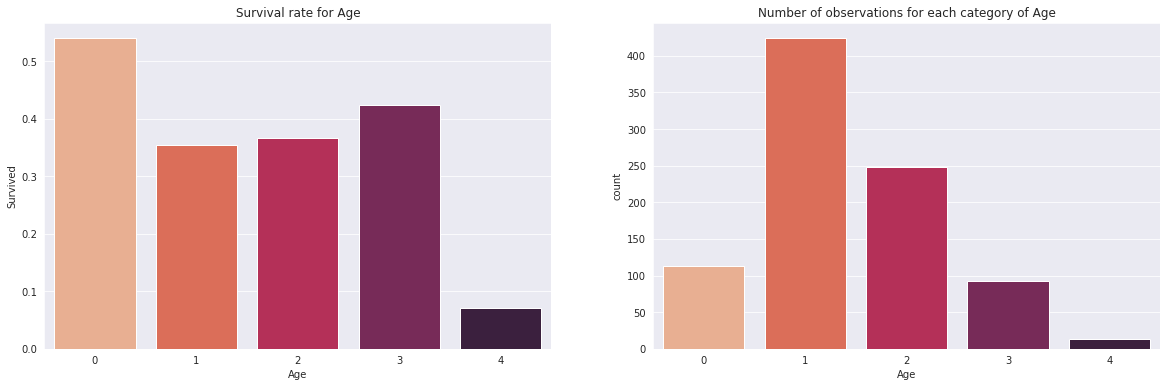

In [15]:
grafico_de_barras_sobrevivencia(train_df, "Age")

É interessante notar que o grupo 3 apresentou a segunda maior taxa de sobrevivência, ficando abaixo apenas do grupo composto por crianças e adolescentes.

## SibSp
Essa coluna indica a quantidade de Siblings (irmaos ou irmas) e Spouse (marido ou esposa) que a pessoas possui e que também estavam a bordo do navio.

In [16]:
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

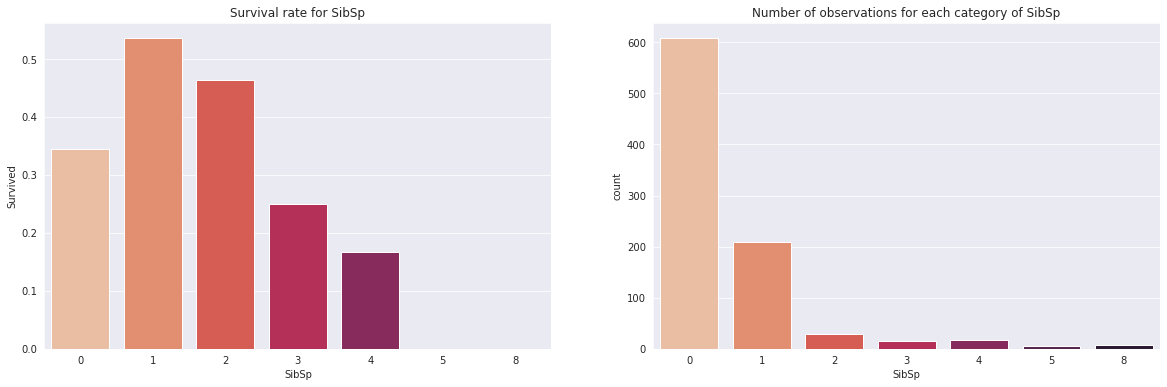

In [17]:
grafico_de_barras_sobrevivencia(train_df, "SibSp")

A partir do gráfico, percebe-se que a maioria das pessoas apresenta SibSp de 0 ou 1. Para os demais valores de SibSp há poucas observações, o que não nos permite concluir muito sobre. Para entender melhor o gráfico acima, vamos ver qual a influência da "coluna" Sex na taxa de sobrevivência de cada grupo 

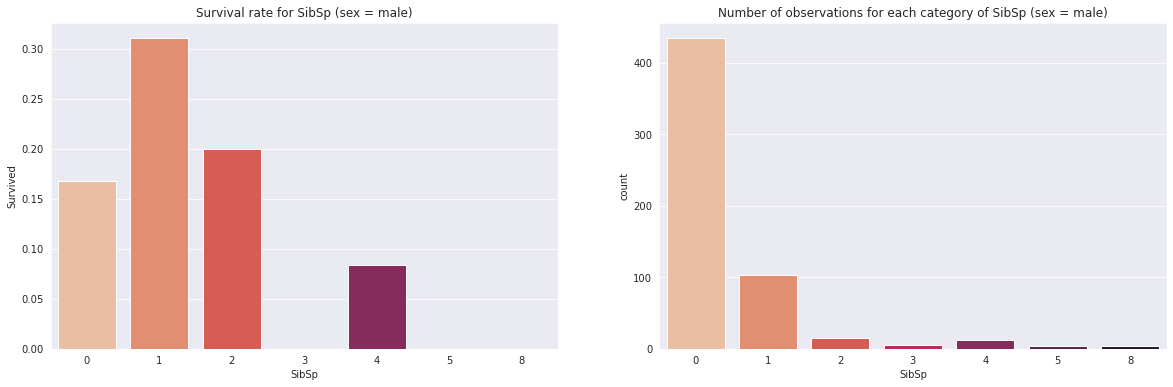

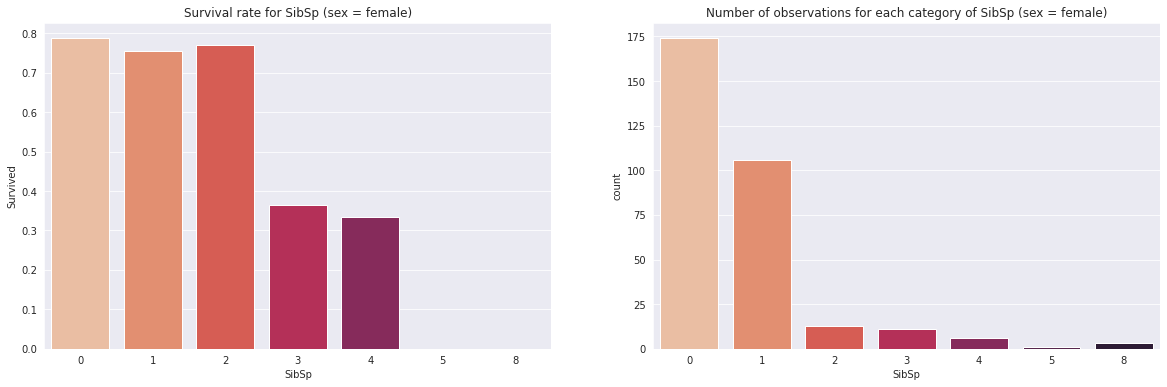

In [18]:
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "male"], "SibSp", title = " (sex = male)")
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "female"], "SibSp", title = " (sex = female)")

Desses gráficos pode-se notar que para os homens, apresentar um SibSp de 1 aumentou consideravelmente a taxa de sobrevivência, enquanto que para as mulheres, não houve muita alteração para a taxa de sobrevivência em função desse valor(os valores obtidos para as categorias 2, 3, 4, 5 e 8 podem ser desconsiderados pois há poucas observações).

Como há poucas observações para SibSp >3, vamos juntar substituir todos os valores > 3 por 3.

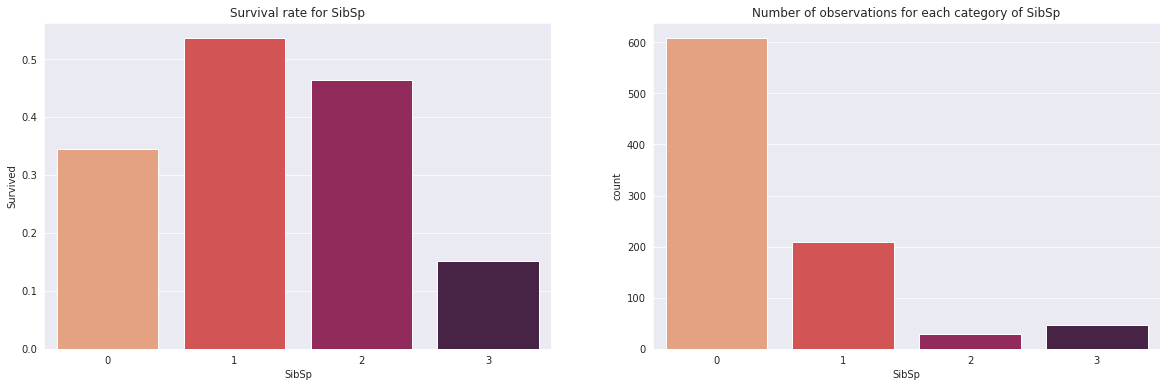

In [19]:
def trataColunaSibSp(df):
    df.loc[df["SibSp"]>3, "SibSp"] = 3
    return df

train_df = trataColunaSibSp(train_df)
grafico_de_barras_sobrevivencia(train_df, "SibSp")

## Parch
Essa coluna representa o número de parents (pai ou mãe) e children (filhos) que a pessoa possui e que também estavam a bordo do titanic

In [20]:
train_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

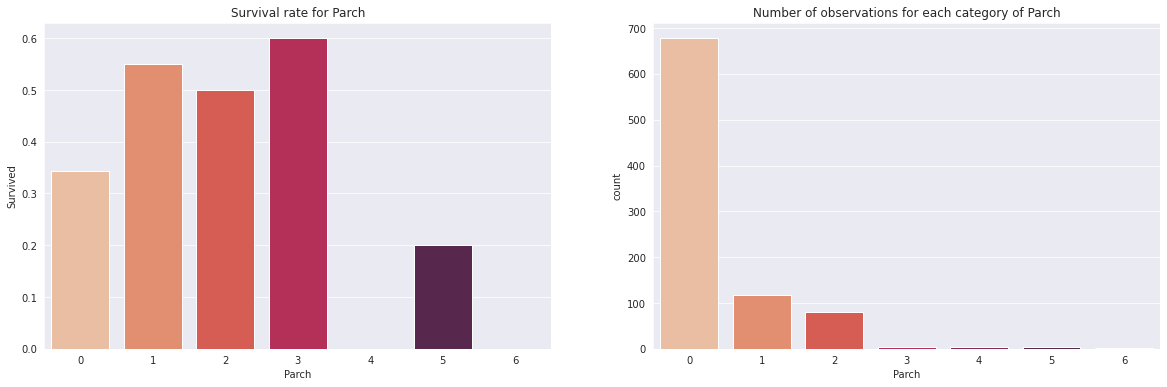

In [21]:
grafico_de_barras_sobrevivencia(train_df, "Parch")

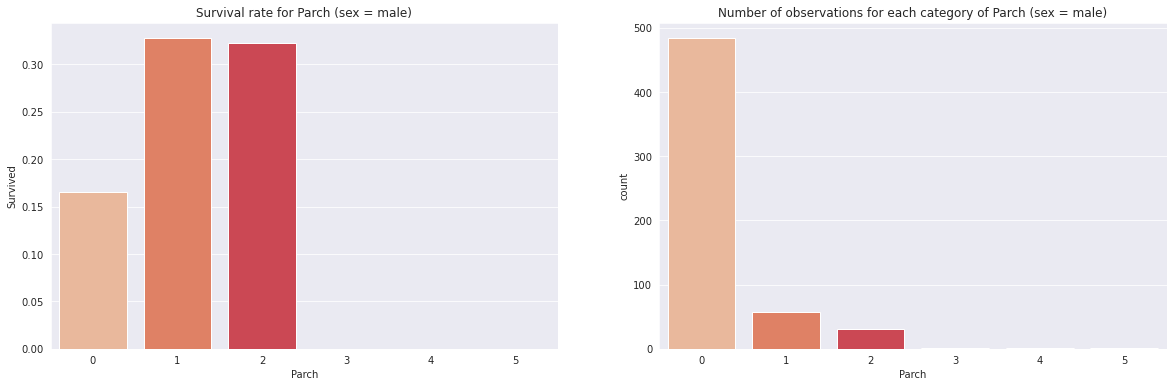

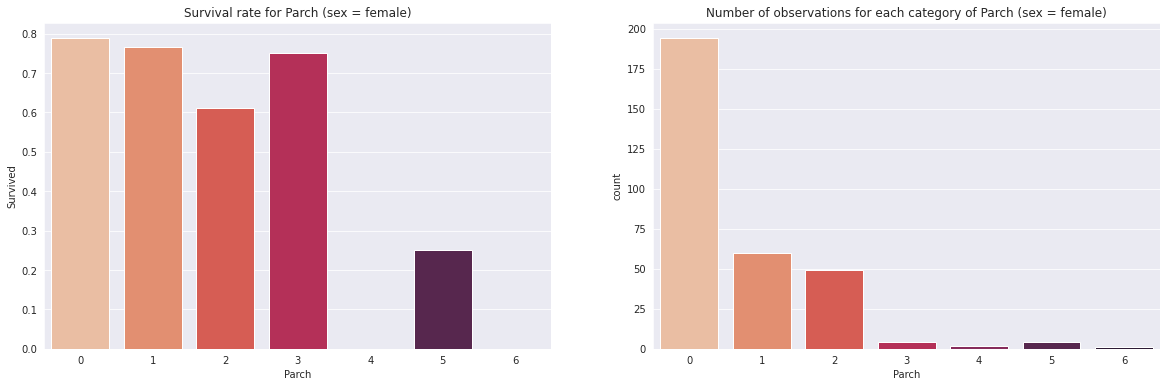

In [22]:
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "male"], "Parch", title = " (sex = male)")
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "female"], "Parch", title = " (sex = female)")

O resultado obtido é muito similar ao anterior. Nota-se que para as mulheres, o valor de Parch teve baixo impacto na taxa de sobrevivência, enquanto que para os homens, um Parch de 1 ou 2, praticamente dobrou a suas chances de sobreviver. Uma possível razão para isso, é que os homens que apresentavam mae ou filhas a bordo acabaram acompanhando elas nos botes salva-vidas. Portanto, para comprovar essa análise vamos criar uma nova coluna que representa o número de mulheres que viajaram junto da pessoa. Para isso, utilizaremos o fato de que para pessoas que viajaram junto, o número do ticket é o mesmo. Para isso, combinaremos as informações do conjunto de teste e de treino.

Mas antes, vamos finalizar a análise da coluna Parch com algo similar ao realizado para a coluna anterior. Vamos substituir os valores >3 por 3.

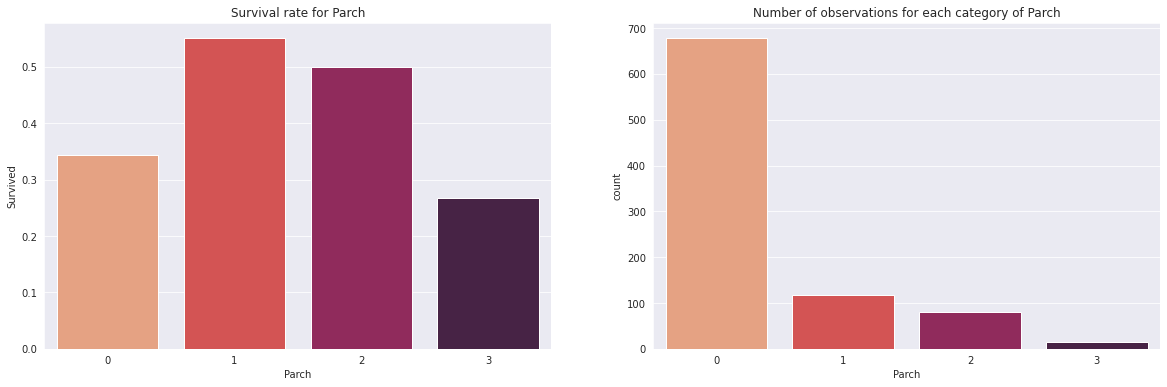

In [23]:
def trataColunaParch(df):
    df.loc[df["Parch"]>3, "Parch"] = 3
    return df

train_df = trataColunaParch(train_df)
grafico_de_barras_sobrevivencia(train_df, "Parch")

## NumWomanWith
Essa coluna representa o número de mulheres que viajaram acompanhado da pessoa em questão. Para calcular ela, utilizamos as informações do Ticket.


In [24]:
def trataColunaNumWomanWith(train, test, is_test = False):
    def get_num(x, fem_ticket):
        if x in fem_ticket.index:
            return fem_ticket.loc[x, "Count"]
        else:
            return 0

    join_dataset = pd.concat([train, test])
    fem_ticket = join_dataset[join_dataset["Sex"]=="female"].groupby("Ticket")[["PassengerId"]].count()
    fem_ticket.columns = ["Count"]
    if is_test:
        test["NumWomanWith"] = test["Ticket"].apply(lambda x:get_num(x, fem_ticket))
        return test
    else:
        train["NumWomanWith"] = train["Ticket"].apply(lambda x:get_num(x, fem_ticket))
        return train

train_df = trataColunaNumWomanWith(train_df, test_df)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumWomanWith
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,0


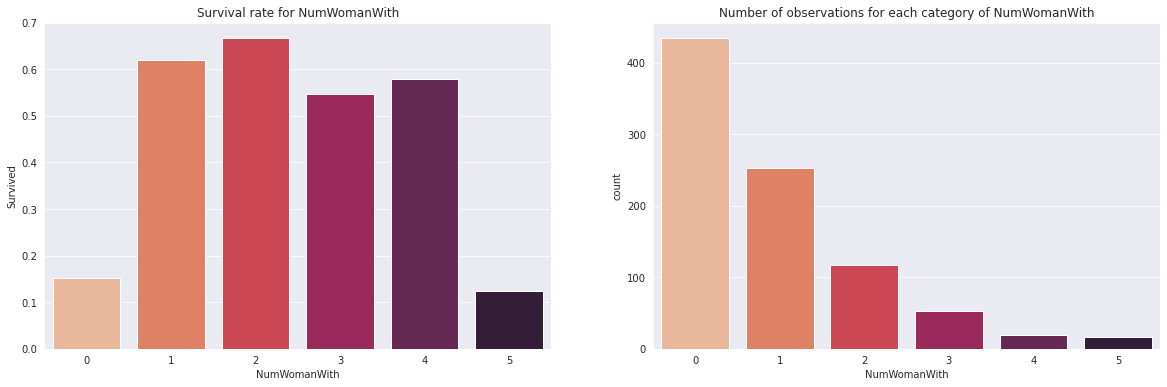

In [25]:
grafico_de_barras_sobrevivencia(train_df, "NumWomanWith")

Esse gráfico é influenciado fortemente pelo genêro, pois toda mulher está acompanhada de pelo menos uma mulher. Portanto, deve-se avaliar essa coluna para os homens apenas.

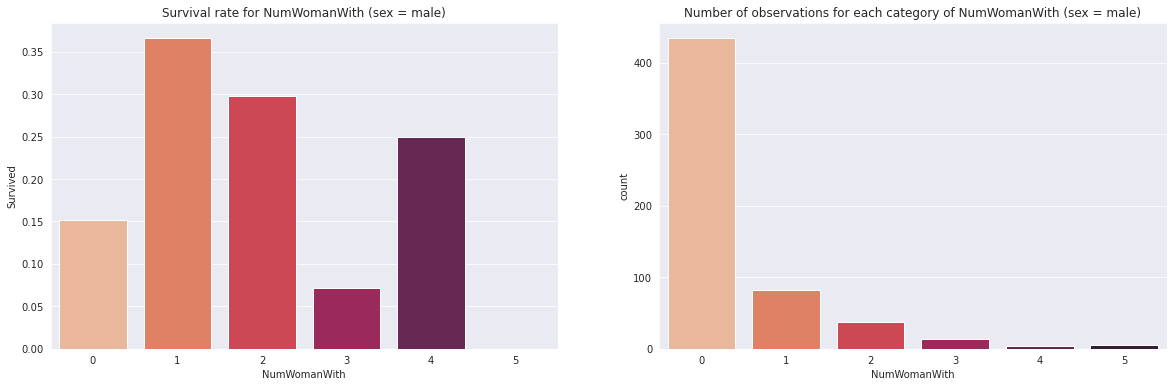

In [26]:
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"]=="male"], "NumWomanWith", title = " (sex = male)")

Nota-se que um homem acompanhado de uma ou duas mulheres, apresenta praticamente o dobro de chances de sobreviver. Para valores mais altos, há poucas observações, portanto vamos juntar os valores >3 na categoria 3.

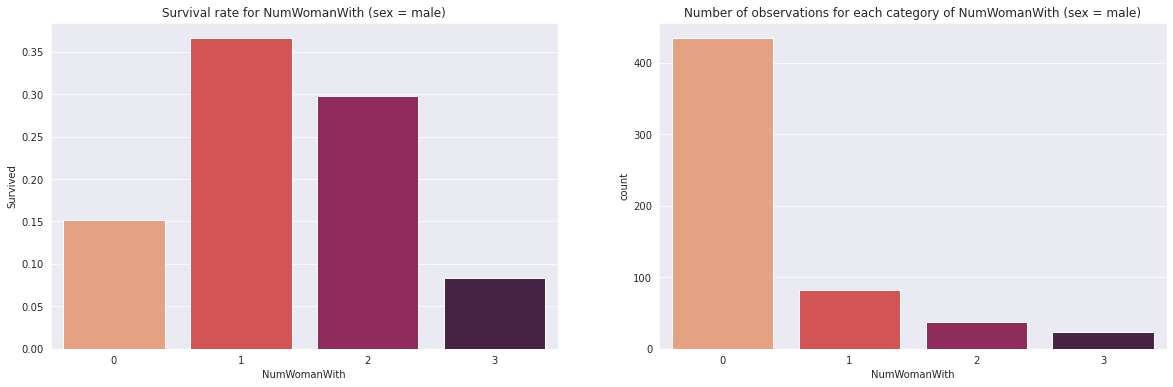

In [27]:
def trataNumWomanWith2(df):
    df.loc[df["NumWomanWith"]>3, "NumWomanWith"] = 3
    return df

train_df = trataNumWomanWith2(train_df)
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"]=="male"], "NumWomanWith", title = " (sex = male)")

## Title
Um dado que podemos extrair da coluna do nome da pessoa, é o pronome de tratamento dela. Essa informação ajuda a entender qual o status econômico dela, fornecendo mais dados que podem ser relevantes para nosso modelo.

In [28]:
def trataColunaTitle(df):
    df["Title"] = df["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()
    return df

train_df = trataColunaTitle(train_df)

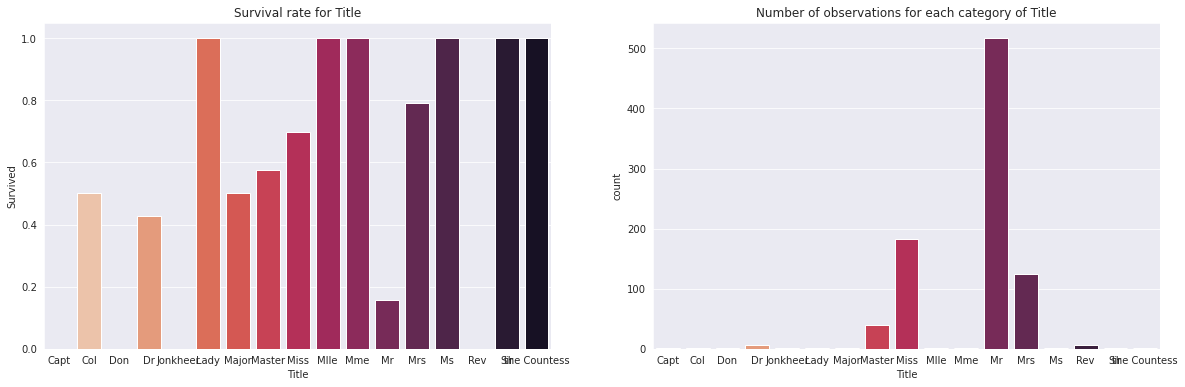

In [29]:
grafico_de_barras_sobrevivencia(train_df, "Title")

Nota-se que há muitas categorias com poucos dados, por conta disso consideraremos apenas "Mr", "Mrs", "Miss", "Master". Os demais títulos serão enquadrados em uma nova categoria "Other".

In [30]:
def trataColunaTitle2(df):
    mask = ~df["Title"].isin(["Mr", "Mrs", "Miss", "Master"])
    df.loc[mask, "Title"] = "Other"
    return df

train_df = trataColunaTitle2(train_df)

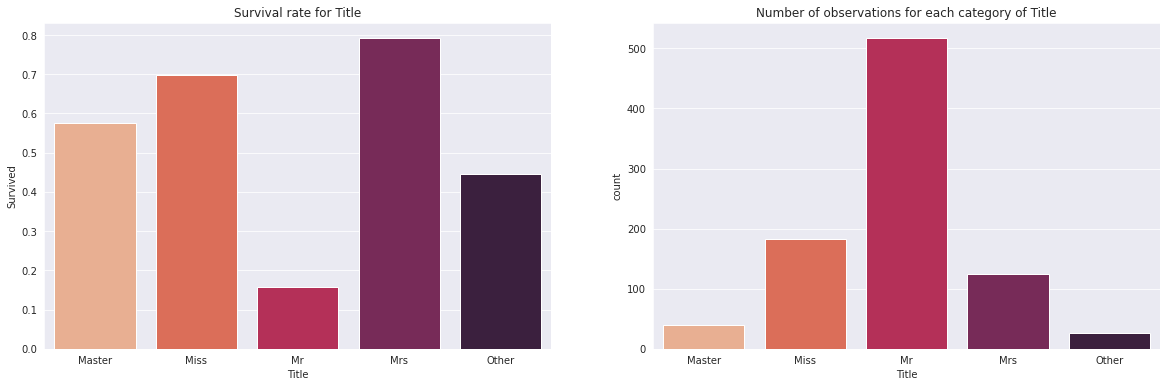

In [31]:
grafico_de_barras_sobrevivencia(train_df, "Title")

## Fare
Valor da passagem paga pela pessoa. Esse valor apresenta interferência de outros quesitos, como: a classe da pessoa, se ela estava com a família (nesse caso ela pagará o valor da passagem de sua família). Por conta disso, não utilizaremos essa coluna

In [32]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

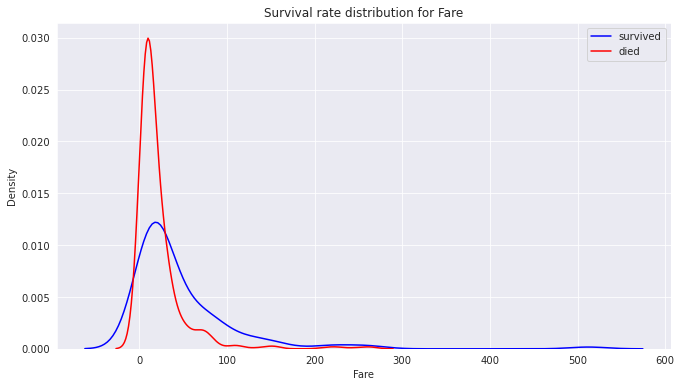

In [33]:
displot_sobrevivencia(train_df, "Fare")

## Cabin, Name, Ticket, Fare
Essas colunas indicam respectivamente: o número da cabine do passageiro, o nome do passageiro e o tíquete do passageiro e o valor do tíquete pago pelo passageiro. De maneira simples, não se pode extrair muitas informações delas, portanto vamos dropá-las.

In [34]:
def trataColunasCNT(df):
    df = df.drop(["Cabin", "Name", "Ticket", "Fare"], axis =1)
    return df

train_df = trataColunasCNT(train_df)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,NumWomanWith,Title
0,1,0,3,male,1,1,0,S,0,Mr
1,2,1,1,female,2,1,0,C,1,Mrs
2,3,1,3,female,1,0,0,S,1,Miss
3,4,1,1,female,2,1,0,S,1,Mrs
4,5,0,3,male,2,0,0,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1,0,0,S,0,Other
887,888,1,1,female,1,0,0,S,1,Miss
888,889,0,3,female,1,1,2,S,2,Miss
889,890,1,1,male,1,0,0,C,0,Mr


## Embarked
Essa coluna indica o lugar que o passageiro embarcou. Ela apresenta os seguintes valores:
* C = Cherbourg;
* Q = Queenstown;
* S = Southampton.

Como ela apresenta apenas dois valores desconhecidos, vamos analisar o impacto da coluna as informações que a coluna pode acrescentar para depois decidir o que fazer com os NaN's.

In [35]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

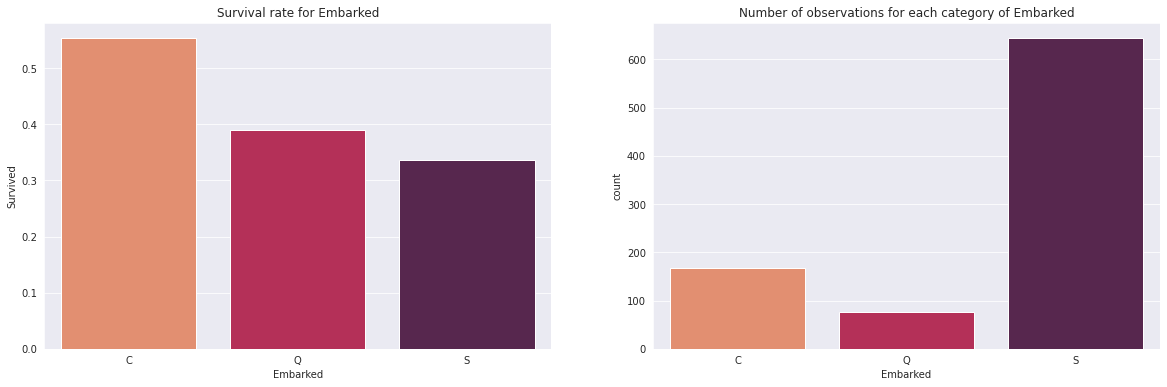

In [36]:
grafico_de_barras_sobrevivencia(train_df, "Embarked")

Pode-se notar, que o local de embarque apresenta uma certa influência sobre a taxa de sobrevivência. Por fim, vamos substituir os NaN's pela moda.

In [37]:
def trataColunaEmbarked(train, test=None, is_test=False):
    mode = train["Embarked"].mode().values[0]

    if is_test:
        test["Embarked"].fillna(mode, inplace = True)
        return test
    else:
        train["Embarked"].fillna(mode, inplace = True)
        return train

train_df = trataColunaEmbarked(train=train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   891 non-null    int64 
 1   Survived      891 non-null    int64 
 2   Pclass        891 non-null    int64 
 3   Sex           891 non-null    object
 4   Age           891 non-null    int64 
 5   SibSp         891 non-null    int64 
 6   Parch         891 non-null    int64 
 7   Embarked      891 non-null    object
 8   NumWomanWith  891 non-null    int64 
 9   Title         891 non-null    object
dtypes: int64(7), object(3)
memory usage: 69.7+ KB


## Mais alguns gráficos

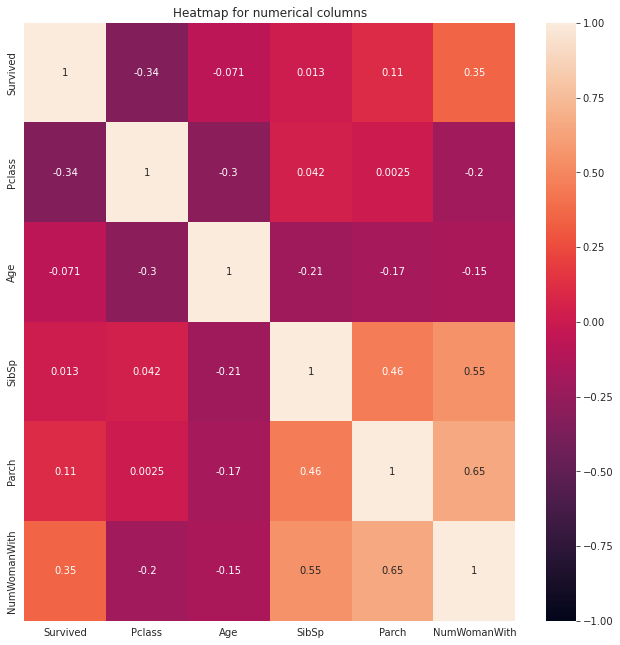

In [38]:
corr = train_df.drop("PassengerId", axis =1).corr()
fig, ax = plt.subplots(figsize = (11, 11))

sns.heatmap(corr, ax = ax, vmin = -1, vmax = 1, annot = True)
ax.set_title("Heatmap for numerical columns")
plt.show()

## Tratamento dos dados de teste
Devemos aplicar os mesmos tratamentos para os dados de teste

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [40]:
test_df = trataColunaAge(train= train_df, test= test_df, is_test=True)
test_df = trataColunaEmbarked(train=train_df, test=test_df, is_test=True)
test_df = trataColunaParch(test_df)
test_df = trataColunaSibSp(test_df)
test_df = trataColunaNumWomanWith(train_df, test_df, is_test=True)
test_df = trataNumWomanWith2(test_df)
test_df = trataColunaTitle(test_df)
test_df = trataColunaTitle2(test_df)
test_df = trataColunasCNT(test_df)

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   418 non-null    int64 
 1   Pclass        418 non-null    int64 
 2   Sex           418 non-null    object
 3   Age           418 non-null    int64 
 4   SibSp         418 non-null    int64 
 5   Parch         418 non-null    int64 
 6   Embarked      418 non-null    object
 7   NumWomanWith  418 non-null    int64 
 8   Title         418 non-null    object
dtypes: int64(6), object(3)
memory usage: 29.5+ KB


In [42]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,NumWomanWith,Title
0,892,3,male,2,0,0,Q,0,Mr
1,893,3,female,2,1,0,S,1,Mrs
2,894,2,male,3,0,0,Q,0,Mr
3,895,3,male,1,0,0,S,0,Mr
4,896,3,female,1,1,1,S,1,Mrs
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0,0,0,S,0,Mr
414,1306,1,female,2,0,0,C,1,Other
415,1307,3,male,2,0,0,S,0,Mr
416,1308,3,male,0,0,0,S,0,Mr


In [43]:
train_df.to_csv("data/train_clean.csv", index = False)
test_df.to_csv("data/test_clean.csv", index = False)